In [146]:
from datetime import datetime

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score


# set defaults for plots
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.labelweight'] = 'bold'


In [147]:
def evaluate_model(features, target, df, model):
    predicted = pd.Series(np.zeros(len(df)))
    
    for train, test in KFold(len(df), n_folds=10):
        model.fit(df.iloc[train][features], df.iloc[train][target])
        predicted.iloc[test] = model.predict(df.iloc[test][features])
        
    r2 = r2_score(df[target], predicted)
    corr = np.corrcoef(df[target], predicted)[0, 1]
    return predicted, r2, corr


def display_model_results(title, actual, predicted, r2, corr):
    plt.figure(figsize=(13, 6))
    plt.plot(df.dteday, actual, 'b')
    plt.plot(df.dteday, predicted, 'r')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Riders')
    plt.legend(['Actual', 'Predicted'], loc='upper left')

    print('Correlation = {:.4f}'.format(corr))
    print('R^2         = {:.4f}'.format(r2))

Converting the format of bike_original.csv

In [148]:
def convert():
    orig = open('./data/bike_original.csv', 'r')
    text = orig.read()
    text = text.replace('.', '')
    text = text.replace(',', '.')
    text = text.replace(';', ',')
    output = open('./data/bike_converted.csv', 'w')
    output.write(text)
    orig.close()
    output.close()
    
convert()

Deploying data in graphics and taking 5 random numbers to show


In [186]:
datafile = 'data/bike_meteo.csv'
df = pd.read_csv(datafile)
df.dteday = pd.to_datetime(df.dteday)
# for col in ['season', 'holiday', 'weekday', 'workingday', 'weathersit']:
#     df[col] = df[col].astype('category')
# df['mnth_yr'] = df.yr*12+df.mnth
# df = df.rename(columns={'instant': 'day'})
df.sample(5)

dteday  usage_hours  available_hours  service_hours  \
258 2016-04-24      3377.62         42594.33       45971.95   
194 2016-02-20      3350.82         48759.00       52109.82   
278 2016-05-14      2693.62         46073.39       48767.01   
63  2015-10-12      5523.72         33300.05       38823.77   
187 2016-02-13      2228.82         51033.28       53262.10   

     average_available  registered  casual    cnt  rain  wind  
258            1915.50        8065     553   8618   0.9    13  
194            2171.24        7314     325   7639   0.0     0  
278            2031.96        7334     382   7716   0.0     0  
63             1617.66       10093     533  10626   1.3     0  
187            2219.25        5180     133   5313   5.6     0

1. Total number of riders

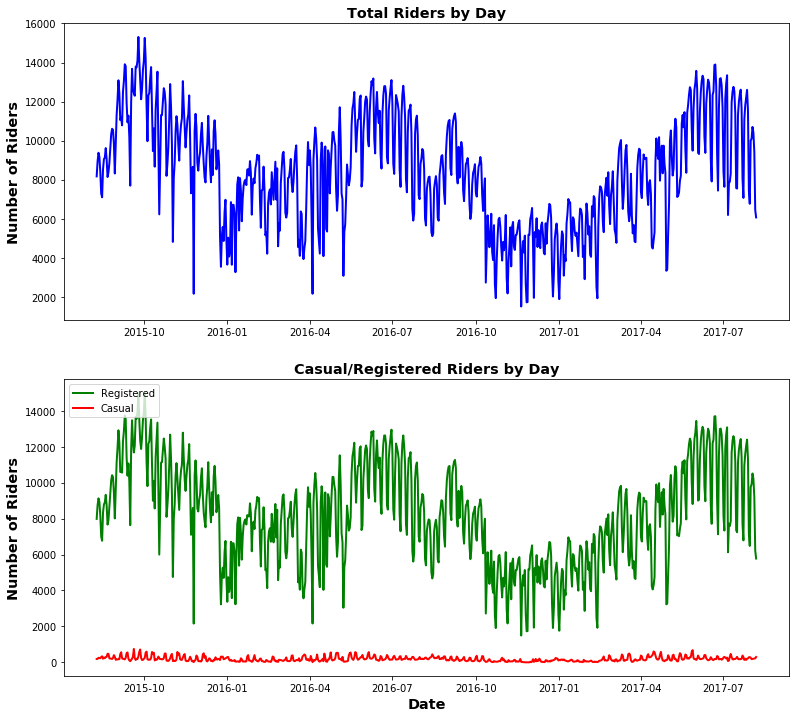

In [187]:
plt.figure(figsize=(13, 12))
plt.subplot(211)
plt.plot(df.dteday, df.cnt, 'b')
plt.title('Total Riders by Day')
plt.ylabel('Number of Riders')

plt.subplot(212)
plt.plot(df.dteday, df.registered, 'g')
plt.plot(df.dteday, df.casual, 'r')
plt.title('Casual/Registered Riders by Day')
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.legend(['Registered', 'Casual'], loc='upper left');

Predict the total number of riders depending of the availability of bikes by hours

Correlation = 0.8837
R^2         = 0.7789


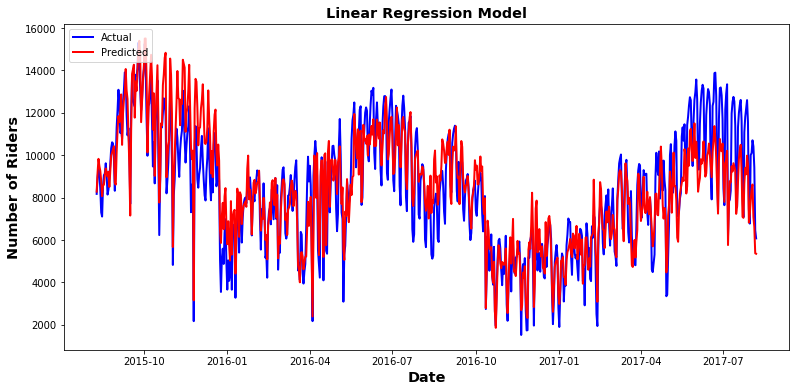

In [188]:
features = ['usage_hours','average_available','wind', 'rain']
target = 'cnt'
model = LinearRegression()

predicted, r2, corr = evaluate_model(features, target, df, model)
display_model_results('Linear Regression Model', df[target], predicted, r2, corr)